In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10, 6)})
sns.set_context("talk")
sns.set_style("whitegrid")
osl_palette = ["#ED9A1B",  "#A82BF4"]
sns.set_palette(osl_palette)

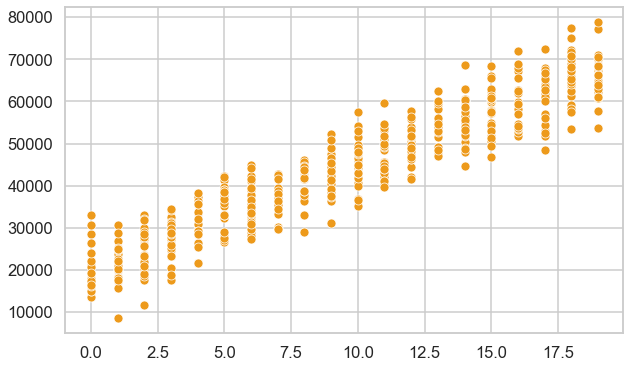

In [2]:
x = np.random.randint(0, 20, size=500)
y_noise = 5000
y = 20000 + 2500 * x + np.random.normal(0, y_noise, size=x.shape)

sns.scatterplot(x=x, y=y);

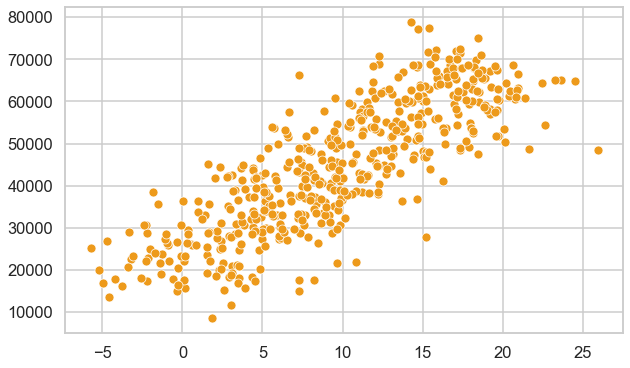

In [3]:
x_noise = 3
x_anon = x + np.random.normal(0, x_noise, size=x.shape)
sns.scatterplot(x=x_anon, y=y);

# Naive OLS

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model_anon = LinearRegression(fit_intercept=True).fit(x_anon.reshape(-1,1), y)

print(model_anon.intercept_, model_anon.coef_[0])

25683.80048374637 1946.432783596641


In [6]:
model = LinearRegression(fit_intercept=True).fit(x.reshape(-1, 1), y)

print(model.intercept_, model.coef_[0])

20112.714883290806 2503.6690872684785


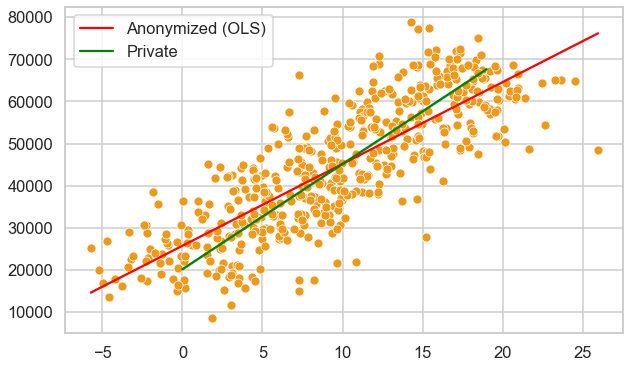

In [7]:
sns.scatterplot(x=x_anon, y=y)

sns.lineplot(x=x_anon,
             y=model_anon.predict(x_anon.reshape(-1,1)),
             color='red',
             label='Anonymized (OLS)')
sns.lineplot(x=x,
             y=model.predict(x.reshape(-1,1)),
             color='green',
             label='Private')

plt.show()

In [8]:
import pandas as pd

def deming_regression(x_anon, y, x_noise, y_noise):
    data = pd.DataFrame({'x': x_anon, 'y': y})
    x_mean = data['x'].mean()
    y_mean = data['y'].mean()
    cov = data.cov()
    s_xx = cov['x']['x']
    s_xy = cov['x']['y']
    s_yy = cov['y']['y']
    delta = (y_noise / x_noise) ** 2
    slope = (
        (s_yy - delta * s_xx + np.sqrt((s_yy - delta * s_xx) ** 2 + 4 * delta * s_xy ** 2)) /
        (2 * s_xy)
    )
    intercept = y_mean - slope * x_mean
    
    return intercept, slope

In [9]:
intercept, slope = deming_regression(x_anon, y, x_noise, y_noise)

In [10]:
intercept, slope

(19745.694180087612, 2563.5399349463396)

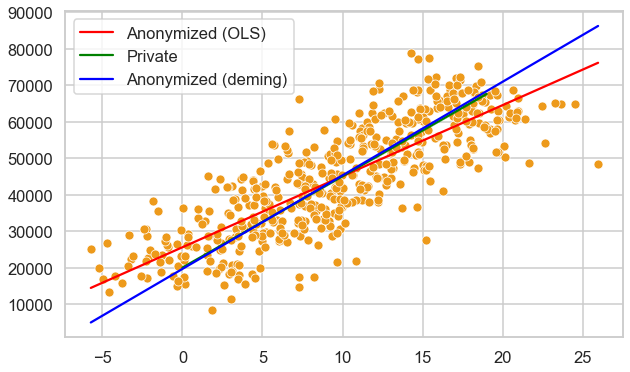

In [11]:
sns.scatterplot(x=x_anon, y=y)

sns.lineplot(x=x_anon,
             y=model_anon.predict(x_anon.reshape(-1,1)),
             color='red',
             label='Anonymized (OLS)')
sns.lineplot(x=x,
             y=model.predict(x.reshape(-1,1)),
             color='green',
             label='Private')
sns.lineplot(x=x_anon,
             y=intercept + x_anon * slope,
             color='blue',
             label='Anonymized (deming)')

plt.show()

In [12]:
y_res_noise = (model_anon.predict(x_anon.reshape(-1, 1)) - y).std()

y_res_noise

8802.023930235506

In [13]:
intercept_unknown, slope_unknown = deming_regression(x_anon, y, x_noise, y_res_noise)

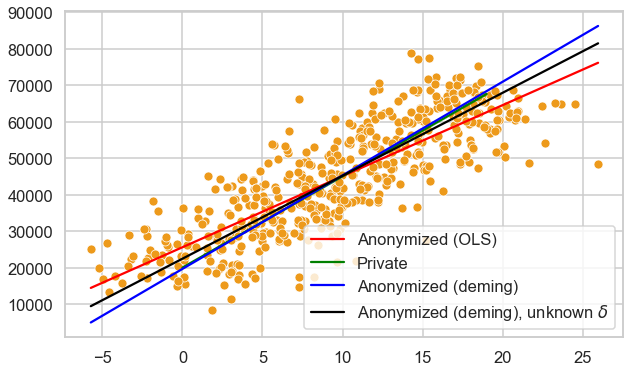

In [14]:
sns.scatterplot(x=x_anon, y=y)

sns.lineplot(x=x_anon,
             y=model_anon.predict(x_anon.reshape(-1,1)),
             color='red',
             label='Anonymized (OLS)')
sns.lineplot(x=x,
             y=model.predict(x.reshape(-1,1)),
             color='green',
             label='Private')
sns.lineplot(x=x_anon,
             y=intercept + x_anon * slope,
             color='blue',
             label='Anonymized (deming)')
sns.lineplot(x=x_anon,
             y=intercept_unknown + x_anon * slope_unknown,
             color='black',
             label='Anonymized (deming), unknown $\delta$')

plt.show()